In [77]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import os
from PIL import Image
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout


In [49]:
# Função que carrega a imagem e normaliza entre os valores 0 e
def read_img(path_img, img_size, img_size_xc):
    with Image.open(path_img) as image:
        img = image
        img = img.resize((img_size, img_size_xc))
        img = img.convert('RGB')
        img = np.asarray(img)
        height, width, chan = img.shape  # Altura largura e canal de cores
        assert chan == 3  # Caso seja falso a execução é interrompida
        img = img/255.
    return img

In [50]:
#  Ler os rótulos das fotos e retorna 0 para masculino e 1 para feminino
def read_label(label):
  gender = label[0]

  if(gender == 'f'):
    return 1
  else:
    return 0


In [51]:
path = '/content/drive/MyDrive/Colab Notebooks/Colab-RESTIC36/Projetos/projeto2/photos/'

In [52]:
# A lista contém uma lista com o nome(srt) de cada imagem presente no dataset
lista_fotos = os.listdir(path)

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Explorando os dados

In [54]:
img = read_img(path + lista_fotos[6], 200, 200)

([], [])

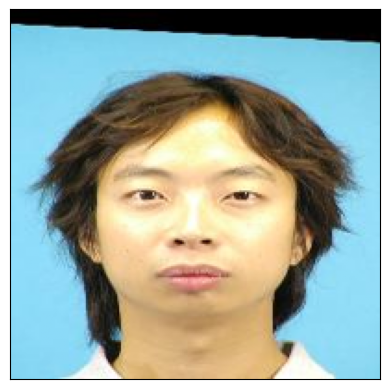

In [55]:
plt.imshow(img)
plt.xticks([],[])
plt.yticks([],[])

In [56]:
todas_fotos = [] # Lista de todas as fotos lidas, e em memória
rotulos = [] # Rótulos dos dados com 0 e 1.

# Ler todas as fotos do dataset
for nome_foto in lista_fotos:
  todas_fotos.append(read_img(path_img=path+nome_foto, img_size=200, img_size_xc=200))
  rotulos.append(read_label(nome_foto))


# Separando os dados de treino e teste


In [57]:
x_train, x_test, y_train, y_test = train_test_split(todas_fotos, rotulos, test_size=0.3, random_state=23, shuffle=True)

# Transforma os dados de treinamento para o tipo numpy, adequando para realizar o treinamento com o tensorflow
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

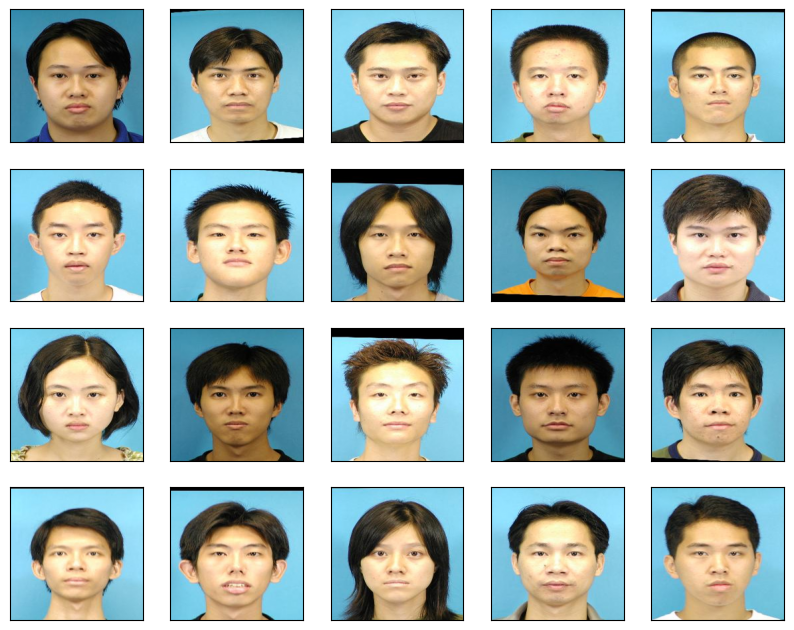

In [58]:
figura = plt.figure(figsize=(10,10))
for i in range(20):
    figura.add_subplot(5,5, i+1)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(x_train[i])
plt.show()

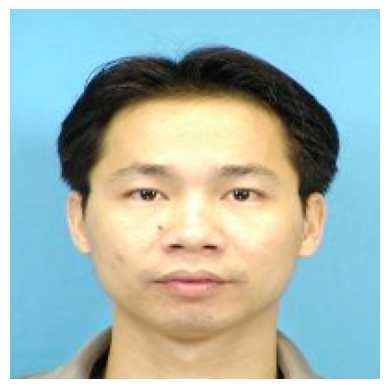

In [59]:
# Plot de imagem após converte para tipo numpy

plt.imshow(x_train[18])
plt.axis("off")  # Remove os eixos
plt.show()

# Construindo o modelo de aprendizado


---



In [127]:
# 4. construir o modelo sequencial
model = tf.keras.Sequential()

inputs_layer = model.add( tf.keras.layers.Input((200,200,3)) )

model.add( tf.keras.layers.Convolution2D(32, (5, 5), padding = 'same', activation='relu') )
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))


model.add( tf.keras.layers.Convolution2D(32, (5, 5), padding = 'same', activation='relu') )
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add( tf.keras.layers.Convolution2D(32, (5, 5), padding = 'same', activation='relu') )
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add( tf.keras.layers.Flatten() )

model.add(tf.keras.layers.Dense(256, activation='relu'))


model.add(tf.keras.layers.Dense(32, activation='relu'))

output = model.add( tf.keras.layers.Dense(1, activation='sigmoid') )

In [128]:
# 5. Compilar o modelo
model.compile(optimizer= 'adam',
    loss='binary_crossentropy',  # Perda para problemas binários
    metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 200, 200, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 66, 66, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 66, 66, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │         991,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,053,441 (4.02 MB)

 Trainable params: 1,053,441 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
history = model.fit(x=x_train,y=y_train, verbose=2,epochs=30, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/30
9/9 - 5s - 599ms/step - accuracy: 0.6641 - loss: 0.6768 - val_accuracy: 0.6316 - val_loss: 0.7070
Epoch 2/30
9/9 - 1s - 150ms/step - accuracy: 0.7481 - loss: 0.5716 - val_accuracy: 0.6316 - val_loss: 0.7704
Epoch 3/30
9/9 - 0s - 36ms/step - accuracy: 0.7481 - loss: 0.5884 - val_accuracy: 0.6316 - val_loss: 0.6308
Epoch 4/30
9/9 - 0s - 30ms/step - accuracy: 0.7481 - loss: 0.5772 - val_accuracy: 0.6316 - val_loss: 0.6269
Epoch 5/30
9/9 - 0s - 27ms/step - accuracy: 0.7481 - loss: 0.4839 - val_accuracy: 0.7544 - val_loss: 0.5513
Epoch 6/30
9/9 - 0s - 25ms/step - accuracy: 0.8015 - loss: 0.4888 - val_accuracy: 0.8246 - val_loss: 0.4041
Epoch 7/30
9/9 - 0s - 20ms/step - accuracy: 0.8702 - loss: 0.3999 - val_accuracy: 0.8421 - val_loss: 0.4374
Epoch 8/30
9/9 - 0s - 21ms/step - accuracy: 0.8779 - loss: 0.3024 - val_accuracy: 0.8421 - val_loss: 0.4483
Epoch 9/30
9/9 - 0s - 36ms/step - accuracy: 0.8702 - loss: 0.3288 - val_accuracy: 0.8246 - val_loss: 0.5969
Epoch 10/30
9/9 - 0s - 19m

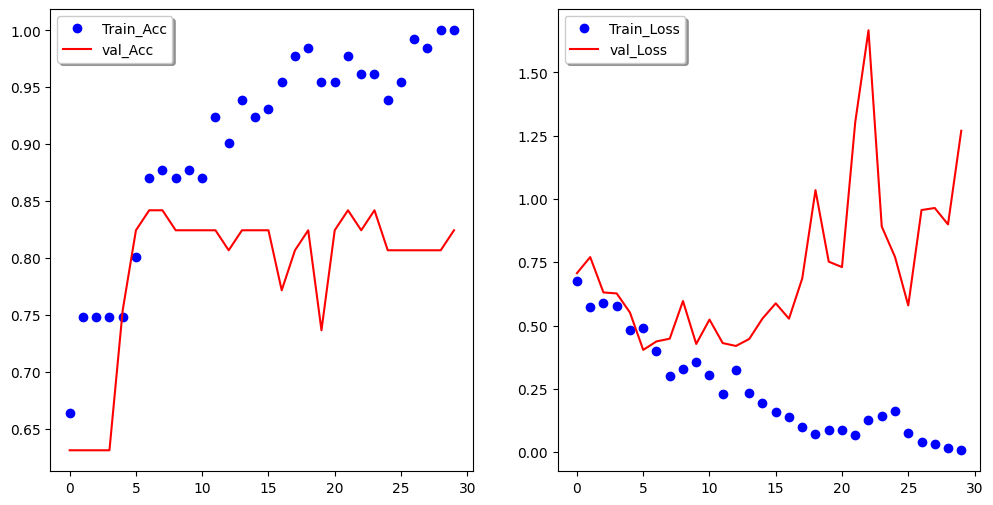

In [131]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'bo', label="Train_Acc")
plt.plot(epochs, val_accuracy, 'r', label="val_Acc")
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label="Train_Loss")
plt.plot(epochs, val_loss, 'r', label="val_Loss")
plt.legend(loc='best', shadow=True)

# Implementando Cross Validation

In [132]:
type(todas_fotos)

numpy.ndarray

In [133]:

from sklearn.model_selection import KFold

# Configuração de validação cruzada (K-Fold)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop pelos folds
fold = 1
accuracies = []


todas_fotos = np.array(todas_fotos)
rotulos = np.array(rotulos)

for train_idx, test_idx in kfold.split(todas_fotos):
    print(f"Treinando o Fold {fold}...")

    # Dividir os dados
    Xtrain, Xtest = todas_fotos[train_idx], todas_fotos[test_idx]
    ytrain, ytest = rotulos[train_idx], rotulos[test_idx]


    # Criar e treinar o modelo

    model.fit(Xtrain, ytrain, epochs=5, batch_size=32, verbose=1)

    # Avaliar o modelo
    loss, accuracy = model.evaluate(Xtest, ytest, verbose=0)
    print(f"Fold {fold} - Acurácia: {accuracy:.4f}")
    accuracies.append(accuracy)
    fold += 1

# Resultados finais
print("\nResultados Gerais:")
print(f"Acurácia Média: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")

Treinando o Fold 1...
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.9622 - loss: 0.2359
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9086 - loss: 0.2623
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9483 - loss: 0.1367
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9441 - loss: 0.2087
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9845 - loss: 0.1286
Fold 1 - Acurácia: 0.9211
Treinando o Fold 2...
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9537 - loss: 0.1287
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9671 - loss: 0.0892
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9807 - loss: 0.0706
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9759 - loss: 0.0826
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9895 - loss: 0.0693
Fold 2 - Acurácia: 0.9474
Treinando o Fold 3...
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0